In [242]:
import torch
import torch.nn as nn
import pandas as pd
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [243]:
df_x_train = pd.read_csv("/Users/placid_brain/Documents/non text content based models/all_variables/train/X_train.csv")
df_y_train = pd.read_csv("/Users/placid_brain/Documents/non text content based models/all_variables/train/y_train.csv")

df_x_test = pd.read_csv("/Users/placid_brain/Documents/non text content based models/all_variables/test/X_test.csv")
df_y_test = pd.read_csv("/Users/placid_brain/Documents/non text content based models/all_variables/test/y_test.csv")

df_x_train = df_x_train.drop(["original_text"], axis=1)
df_x_test = df_x_test.drop(["original_text"], axis=1)

In [244]:
train = pd.concat([df_x_train,df_y_train], axis=1)
test = pd.concat([df_x_test,df_y_test], axis=1)
print(len(train.index))

7000


In [245]:
train=train.drop(train.columns[[6]],axis=1)
test=test.drop(test.columns[[6]],axis=1)
print(train.head())
print(test.head())

   sentiment_class  is_retweeted_encoded  day  hour_posted  \
0              2.0                   0.0  4.0         18.0   
1              2.0                   1.0  4.0         12.0   
2              1.0                   1.0  4.0         17.0   
3              2.0                   1.0  2.0         20.0   
4              1.0                   1.0  4.0         13.0   

   original_author_class  retweet_count  
0               169156.0           83.0  
1                18220.0         1350.0  
2               189549.0         6343.0  
3                94628.0          581.0  
4                16234.0           19.0  
   sentiment_class  is_retweeted_encoded  day  hour_posted  \
0              2.0                   1.0  4.0         14.0   
1              2.0                   1.0  4.0         13.0   
2              1.0                   0.0  2.0         21.0   
3              2.0                   1.0  4.0         13.0   
4              1.0                   1.0  4.0         13.0   

  

In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
sentiment_class          7000 non-null float64
is_retweeted_encoded     7000 non-null float64
day                      7000 non-null float64
hour_posted              7000 non-null float64
original_author_class    7000 non-null float64
retweet_count            7000 non-null float64
dtypes: float64(6)
memory usage: 328.2 KB


In [247]:
class MyDataset(Dataset):
 
  def __init__(self,df):
   
 
    x=df.iloc[:,0:5].values
    y=df.iloc[:,5].values
 
    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

train_dataset=MyDataset(train)
train_loader=DataLoader(train_dataset,batch_size=10,shuffle=False)

for i, (data,rtwt) in enumerate(train_loader):
    print(i, data, rtwt)
    break

0 tensor([[2.0000e+00, 0.0000e+00, 4.0000e+00, 1.8000e+01, 1.6916e+05],
        [2.0000e+00, 1.0000e+00, 4.0000e+00, 1.2000e+01, 1.8220e+04],
        [1.0000e+00, 1.0000e+00, 4.0000e+00, 1.7000e+01, 1.8955e+05],
        [2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+01, 9.4628e+04],
        [1.0000e+00, 1.0000e+00, 4.0000e+00, 1.3000e+01, 1.6234e+04],
        [1.0000e+00, 0.0000e+00, 4.0000e+00, 1.4000e+01, 1.0926e+05],
        [2.0000e+00, 1.0000e+00, 4.0000e+00, 1.2000e+01, 8.2538e+04],
        [1.0000e+00, 1.0000e+00, 6.0000e+00, 2.3000e+01, 1.3829e+05],
        [0.0000e+00, 1.0000e+00, 4.0000e+00, 1.2000e+01, 3.0558e+05],
        [0.0000e+00, 1.0000e+00, 4.0000e+00, 1.5000e+01, 8.5493e+04]]) tensor([  83., 1350., 6343.,  581.,   19., 1517.,  148.,   90.,   71.,  208.])


In [248]:
import torch.nn.functional as F

class DNNLinReg4(nn.Module):
    def __init__(self):
        super(DNNLinReg4, self).__init__()
        
        self.linear1 = nn.Linear(10, 50)
        
        self.relu1 = nn.ReLU()
        
        self.linear2 = nn.Linear(50,30)
        
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(30,10)
        
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(10,1)
        
    def forward(self,x):
        
        linear1 = self.linear1(x)
        
        relu1= self.relu1(linear1)
        
        linear2 = self.linear2(relu1)
        
        relu2 = self.relu2(linear2)
        
        linear3 = self.linear3(relu2)
        
        relu3 = self.relu3(linear3)
        
        linear4 = self.linear4(relu3)
        
        return linear4
        
        
        
        
        

In [249]:
model = DNNLinReg4()

In [250]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 0.01)


In [251]:
import matplotlib.pyplot as plt
import numpy as np

Training






Epoch:  1 /70 Training loss:  8299904064.240173
Epoch:  2 /70 Training loss:  9017559173.503723
Epoch:  3 /70 Training loss:  8230554023.714428
Epoch:  4 /70 Training loss:  8223241985.65744
Epoch:  5 /70 Training loss:  8216424206.257599
Epoch:  6 /70 Training loss:  8209664662.556824
Epoch:  7 /70 Training loss:  8202954150.859497
Epoch:  8 /70 Training loss:  8196293139.0477295
Epoch:  9 /70 Training loss:  8189681381.6137085
Epoch:  10 /70 Training loss:  8183117319.43689
Epoch:  11 /70 Training loss:  8176600722.576904
Epoch:  12 /70 Training loss:  8170131552.335083
Epoch:  13 /70 Training loss:  8163709780.819336
Epoch:  14 /70 Training loss:  8157335085.570068
Epoch:  15 /70 Training loss:  8151007247.110107
Epoch:  16 /70 Training loss:  8144726004.380615
Epoch:  17 /70 Training loss:  8138491287.919922
Epoch:  18 /70 Training loss:  8132303280.617676
Epoch:  19 /70 Training loss:  8126161413.42627
Epoch:  20 /70 Training loss:  8120065414.878418
Epoch:  21 /70 

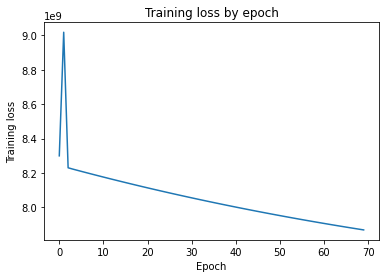

In [252]:
epochs=70
training_loss_val=[]
print("Training")
print(5*'\n')
for epoch in range(epochs):
    
   
    loss_sum = 0
    for  i,(data,rtwt) in enumerate(train_loader):
        
        outputs = model(torch.t(data))
        loss = criterion(outputs, torch.t(rtwt))
        loss_sum+=loss.item()
        
        
        
        loss.backward()
        optimizer.step()
        
        optimizer.zero_grad()
    
    print("Epoch: ",epoch+1,'/70','Training loss: ',np.mean(loss_sum))
        
    
        
    training_loss_val.append(np.mean(loss_sum))

plt.plot(list(range(70)),training_loss_val)
plt.title("Training loss by epoch")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.show()
        
        

Testing








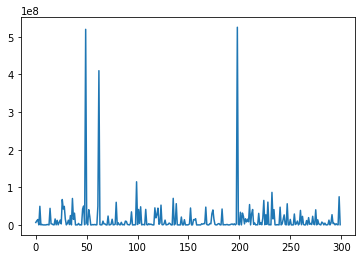

RMSE value:  3888.5208179446004


In [253]:
import math
loss_value=[]
print("Testing")
print(5*'\n')
with torch.no_grad():
    for  i,(data,rtwt) in enumerate(test_loader):

        pred = model(torch.t(data))
        loss = criterion(outputs, torch.t(rtwt))
        loss_value.append(loss.item())
        


plt.plot(list(range(len(test_loader))),loss_value)
plt.show()
    
        

avg_loss = sum(loss_value)/len(test_loader)
       

    
total_rmse_loss= math.sqrt(avg_loss)
print('RMSE value: ',total_loss)
        